# Exercise 7
## Céline Budding && Dorothea Müller 

In [1]:
import numpy as np
import matplotlib as mlp
import matplotlib.pyplot as plt

%matplotlib inline

## 1. Chapman-Kolmogorov

### 1.

In [2]:
N = 2 * 50 + 1
dt = 1
M = int(1000/dt)

In [3]:
distr_over_time = np.zeros((N, M))
distr_over_time.shape

(101, 1000)

In [4]:
# All in one position in the beginning
distr_over_time[int(N/2)][0] = 1
distr_over_time[:, 0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

### 2.

In [5]:
def trans_probability(std_dev, mu, dt, x, x_prime):
    return 1/(np.sqrt(2*np.pi*std_dev**2*dt)) * np.exp(-(x - x_prime - mu *dt)**2/(2*std_dev**2*dt))

In [6]:
transition_prob = np.zeros((N, N))
mu = 0.1
std_dev = 1.0

In [7]:
for new_pos in range(N):
    for old_pos in range(N):
        transition_prob[old_pos][new_pos] = trans_probability(std_dev, mu, dt, new_pos, old_pos)

### 3. 

In [8]:
t1 = distr_over_time[:, 0].T @ transition_prob 

In [9]:
for i, old_pos in enumerate(distr_over_time.T):
    if i == distr_over_time.shape[0]: # Sorry
        break
    
    t1 = distr_over_time[:, i] @ transition_prob
    t1 = t1/np.mean(t1)
    distr_over_time[:, i+1] = t1

In [10]:
np.sum(distr_over_time[:, 400])

0.0

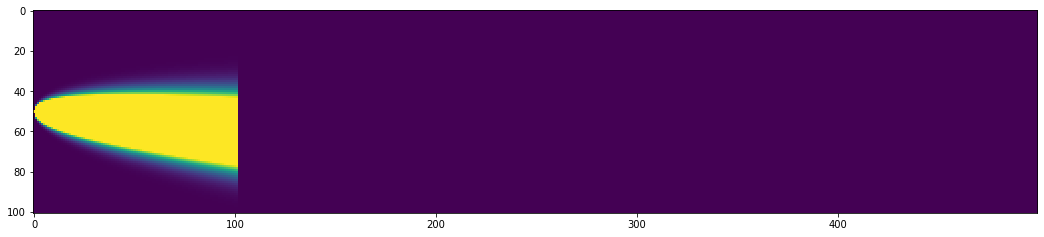

In [17]:
plt.figure(figsize = (18, 5))
plt.imshow(distr_over_time[:, :500], vmin = 0, vmax = 1)

In [12]:
# Check if is probababily.
np.sum(transition_prob[:, 0])

0.6621453017692828

In [13]:
transition_prob

array([[0.39695255, 0.26608525, 0.06561581, ..., 0.        , 0.        ,
        0.        ],
       [0.21785218, 0.39695255, 0.26608525, ..., 0.        , 0.        ,
        0.        ],
       [0.0439836 , 0.21785218, 0.39695255, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.39695255, 0.26608525,
        0.06561581],
       [0.        , 0.        , 0.        , ..., 0.21785218, 0.39695255,
        0.26608525],
       [0.        , 0.        , 0.        , ..., 0.0439836 , 0.21785218,
        0.39695255]])